# Motivation
1. Consider the problem of linear regression. Since we assume a linear relationship between input $x \in \mathbb{R}^d$ and output $y \in \mathbb{R}$ (linear in parameters $w$), we can write the following equation:
$$y = \phi(x) ^ \intercal w$$ <br/>

2. Here $\phi: \mathbb{R}^d \rightarrow \mathbb{R}^n$ is the basis function which extracts features from $x$. Note that $\phi(x)$ can be non-linear function of $x$.<br/><br/>

3. Thus given a matrix $\Phi \in \mathbb{R}^{m \times n}$ which has one row for each of the $m$ training examples, we can find the corresponding labels vector $\mathbf{y} \in \mathbb{R}^m$ as:
$$\mathbf{y} = \Phi w$$<br/>

4. If we impose a prior distribution on $w$ as $p(w) = \mathcal{N}(w|0, \alpha^{-1}I)$ then because of the randomness of $w$ the output vector $\mathbf{y}$ becomes random.<br/><br/>

5. Note that $\mathbf{y}$ is obtained as a linear combination of Gaussian random variables ($w$) and hence $\mathbf{y}$ is itself a Gaussian random vector. This holds for any value of $m$.<br/><br/>

6. **Gaussian Process:** A set of random variables $\{Z_i\}_{i \in S}$, indexed by some set $S$ is called a Gaussian process if for any finite subset of $\{Z_i\}_{i \in S}$, the variables have a joint Gaussian distribution.<br/><br/>

7. **Probability Distribution over Functions:** A Gaussian process can be used to define a probability distribution over functions. Two things to consider here:
  1. **Why do we need such distributions?** Non-parameteric models
  2. **How can Gaussian process model distributions over functions?** $\mathbf{y} = \Phi w$ is a function of $\Phi$.

# Gaussian Process - Visualization
1. We know that $\mathbf{y} = \Phi w$ defines a Gaussian process.<br/><br/>
2. Since it is a Gaussian process, $\mathbf{y}$ will be distributed as a Gaussian random vector.<br/><br/>
3. The distribution of a Gaussian random vector is completely determined by its mean and covariance matrix.<br/><br/>
4. We can find the mean and covariance for the distribution of $\mathbf{y}$ as follows:
$$\mu = \mathbb{E}[\mathbf{y}] = \Phi \mathbb{E}[w] = 0$$
$$\Sigma = \mathbb{E}[\mathbf{yy^\intercal}] = \Phi \mathbb{E}[ww^\intercal] \Phi^\intercal = \alpha^{-1} \Phi \Phi^\intercal$$ <br/>
5. Let $K = \alpha^{-1}\Phi \Phi^\intercal$ be the Gram matrix, then $\Sigma = K$.
$$K_{ij} = k(x^{(i)}, x^{(j)}) = \alpha^{-1} \phi(x^{(i)})^\intercal \phi(x^{(j)})$$ <br/>
6. $k(., .)$ is the kernel function <br/><br/>
7. Obviously $K$ must be positive definite.

### Visualization
We will generate synthetic data points and visualize some sample functions for various kernels.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

m = 200 # Number of data points to generate
k = 5 # Number of samples per kernel
d = 1 # Dimensionality of input data

def phi(x):
    """
        phi(ndarray) -> ndarray
        Calculates feature matrix for the input matrix
        x: (m, d) Input matrix
        Returns:
            phi: (m, n) feature matrix
    """
    return x


def calculate_K(x, kernel_type='rbf'):
    """
        calculate_K(ndarray) -> ndarray
        x: (m, d) Input matrix, one example per row
        kernel_type: Type of kernel to be used
        Returns:
            K: (m, m) gram matrix
    """
    kernels = {
        'rbf': rbf_kernel,
        'linear': linear_kernel,
        'constant': constant_kernel,
        'periodic': periodic_kernel,
        'ou': ou_kernel
    }
    x = phi(x)
    return kernels[kernel_type](x)

### RBF Kernel

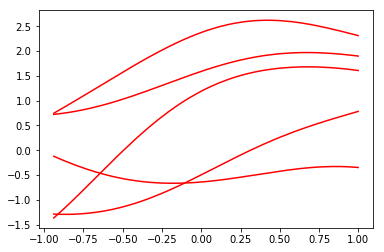

In [18]:
def rbf_kernel(x):
    """
        rbf_kernel(ndarray) -> ndarray
        x: (m, n) Input matrix, one example per row
        Returns:
            K: (m, m) gram matrix using RBF kernel
    """
    sigma = 1
    temp = np.expand_dims(x, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = temp - temp2 # m x m x n
    return np.exp(-(np.square(temp - temp2).sum(axis=2)) / (2*sigma**2))


# Plot samples for RBF kernel
x = np.random.uniform(low=-1, high=1, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mu = np.zeros((m, 1)) # Calculate mu for the joint y distribution
sigma = calculate_K(x) # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mu.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Linear Kernel

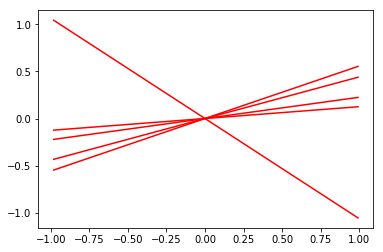

In [19]:
def linear_kernel(x):
    """
        rbf_kernel(ndarray) -> ndarray
        x: (m, n) Input matrix, one example per row
        Returns:
            K: (m, m) gram matrix using linear kernel
    """
    return np.matmul(x, x.T)


# Plot samples for linear kernel
x = np.random.uniform(low=-1, high=1, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mu = np.zeros((m, 1)) # Calculate mu for the joint y distribution
sigma = calculate_K(x, kernel_type='linear') # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mu.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Constant Kernel

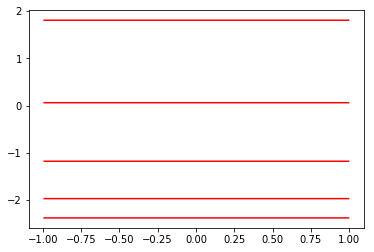

In [20]:
def constant_kernel(x):
    """
        rbf_kernel(ndarray) -> ndarray
        x: (m, n) Input matrix, one example per row
        Returns:
            K: (m, m) gram matrix using constant kernel
    """
    return 5*np.ones((m, m))

# Plot samples for constant kernel
x = np.random.uniform(low=-1, high=1, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mu = np.zeros((m, 1)) # Calculate mu for the joint y distribution
sigma = calculate_K(x, kernel_type='constant') # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mu.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x, y[i, :], 'r-')
plt.show()

### Periodic Kernel

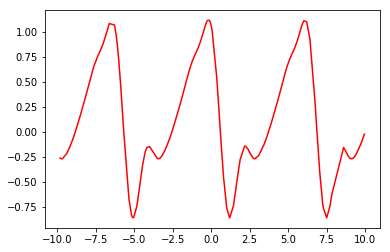

In [21]:
def periodic_kernel(x):
    """
        periodic_kernel(ndarray) -> ndarray
        x: (m, n) Input matrix, one example per row
        Returns:
            K: (m, m) gram matrix using periodic kernel
    """
    sigma = 1
    temp = np.expand_dims(x, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = (temp - temp2).sum(axis=2) # m x m
    return np.exp(-2*np.square(np.sin(diff/2)) / (sigma**2))

k=1
# Plot samples for periodic kernel
x = np.random.uniform(low=-10, high=10, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mu = np.zeros((m, 1)) # Calculate mu for the joint y distribution
sigma = calculate_K(x, kernel_type='periodic') # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mu.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x.squeeze(), y[i, :].squeeze(), 'r-')
plt.show()

### Ornstein-Uhlenbeck Kernel

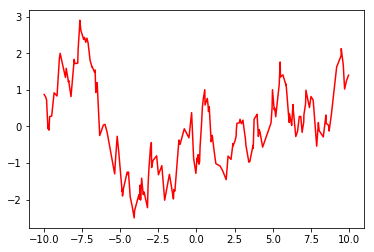

In [22]:
def ou_kernel(x):
    """
        ou_kernel(ndarray) -> ndarray
        x: (m, n) Input matrix, one example per row
        Returns:
            K: (m, m) gram matrix using Ornstein-Uhlenbeck kernel
    """
    sigma = 1
    temp = np.expand_dims(x, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = np.abs(temp - temp2).sum(axis=2) # m x m
    return np.exp(-diff/sigma)

# Plot samples for Ornstein-Uhlenbeck kernel
x = np.random.uniform(low=-10, high=10, size=(m, d)) # Generated data
x = np.sort(x, axis=0)
mu = np.zeros((m, 1)) # Calculate mu for the joint y distribution
sigma = calculate_K(x, kernel_type='ou') # Calculate sigma for joint y distribution
y = np.random.multivariate_normal(mu.squeeze(), sigma, size=k)
for i in range(k):
    plt.plot(x.squeeze(), y[i, :].squeeze(), 'r-')
plt.show()

# Gaussian Process Continued
1. Recall that a Gaussian process defines a probability distribution over functions. <br/> <br/>
2. Gaussian process can also be seen as an infinite dimensional generalization of multivariate Gaussian distribution. <br/> <br/>
3. To define a Gaussian process, we need the following two functions:
  1. **Mean Function: **$\mu: \mathbb{R}^d \rightarrow \mathbb{R}$
  2. **Covariance Function: **$k: \mathbb{R}^{d \times d} \rightarrow \mathbb{R}$ <br/> <br/>
4. The covariance function is a kernel function that should satisfy the usual properties that are imposed on a kernel function. <br/> <br/>
5. If we assume that the mean function is zero everywhere (**Why?**), then the Gaussian process is completely defined by the covariance function - **Intuitive explanation** for how a covariance function gives preference to certain types of functions over other functions <br/> <br/>
6. Gaussian process as a prior distribution over functions in Bayesian framework.

# Gaussian Process Regression
1. **Given: **A dataset of input output pairs. $\mathcal{D} = \{(x^{(i)}, y^{(i)})\}_{i=1}^{m}$, $x^{(i)} \in \mathbb{R}^d$ and $y^{(i)} \in \mathbb{R}$ $\forall i$. <br/><br/>
2. **Goal: **For a new test point $x \in \mathbb{R}^d$ find the corresponding $y$. <br/><br/>
3. **Model: **We assume that there exists a function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ such that $\forall i$:
$$y^{(i)} = f(x^{(i)}) + \epsilon^{(i)}$$
where $\epsilon^{(i)} \sim \mathcal{N}(0, \beta^{-1})$ is drawn independently for all examples in $\mathcal{D}$. <br/><br/>
4. **Note: **We are not assuming any parameteric form for the function $f$. <br/><br/>
5. **Refined Goal: **Given $\mathcal{D}$ and a new test point $x \in \mathcal{R}^d$, recover the function value of $f(x)$. <br/><br/>
6. Since $y^{(i)} = f(x^{(i)}) + \epsilon^{(i)}$ and $\epsilon^{(i)} \sim \mathcal{N}(0, \beta^{-1})$, we can say that:
$$p(y^{(i)} \,\, | \,\, x^{(i)}) = \mathcal{N}(y^{(i)} \,\, | \,\, f(x^{(i)}), \beta^{-1})$$
7. Also, since examples in $\mathcal{D}$ are drawn iid, and $\epsilon^{(i)}$ are also drawn iid, the probability of $\mathbf{y} = \{y^{(1)}, ..., y^{(m)}\}$ given $\mathbf{x} = \{x^{(1)}, ..., x^{(m)}\}$ is given as follows:
$$p(\mathbf{y} \,\, | \,\, \mathbf{x}) = \prod_{i=1}^{m} p(y^{(i)} \,\, | \,\, x^{(i)})$$
which is a multivariate Gaussian distribution (**Why?**). <br/><br/>
8. Given a new point $x$, we want to find the distribution over the corresponding output value $y$. That is, we have to find $p(y \,\, | \,\, x, \mathcal{D})$. <br/><br/>
9. Let $t^{(i)} = f(x^{(i)})$ be the true uncorrupted function output. Since the function is not known, this $t^{(i)}$ is also a random variable. <br/><br/>
10. We define a Gaussian process prior over the functions $f$. Let $\mathbf{t} = \{t^{(i)}\}_{i=1}^{m}$, since we have defined a Gaussian process prior over the functions $f$, we get:
$$p(\mathbf{t}) = \mathcal{N}(0, K)$$
for the Gram matrix $K$ obtained using some **kernel function** $k: \mathbb{R}^{d \times d} \rightarrow \mathbb{R}$. The function $k$ takes as input two examples $x^{(i)}$ and $x^{(j)}$ and returns a measure of covariance between the supposed true output $t^{(i)}$ and $t^{(j)}$. <br/><br/>
11. One intermediate objective is to recover the uncorrupted function values $\mathbf{t}$ given the corrupted observations $\mathbf{y}$. This can be found using Bayes' theorem:
$$p(\mathbf{t} \,\, | \,\, \mathbf{y}) = \frac{p(\mathbf{y} \,\, | \,\, \mathbf{t}) \,\, p(\mathbf{t})}{p(\mathbf{y})} $$
For this, we need $p(\mathbf{y})$ which we will calculate next. <br/><br/>
12. Equipped with all this information, we can now use the following expression:
$$p(\mathbf{y}) = \int p(\mathbf{y}, \mathbf{t}) \,\, d\mathbf{t}$$
$$p(\mathbf{y}) = \int p(\mathbf{y} \,\, | \,\, \mathbf{t}) \,\, p(\mathbf{t}) \,\, d\mathbf{y}$$
$$p(\mathbf{y}) = \mathcal{N}(\mathbf{y} \,\, | \,\, 0, K + \beta^{-1}I)$$ <br/>
13. Similarly one can also find $p(\mathbf{t} \,\, | \,\, \mathbf{y})$ as:
$$p(\mathbf{t} \,\, | \,\, \mathbf{y}) = \mathcal{N}(\mathbf{t} \,\, | \,\, \beta(K^{-1} + \beta I)^{-1}y, \,\, (K^{-1} + \beta I)^{-1})$$

## Gaussian Process Regression - Step by Step Implementation
We will now implement the Gaussian process regression step by step.

In [23]:
# Some useful variables
m = 1000 # Number of training examples
n = 3 # Number of features to use
beta = 1.0 # Inverse standard deviation for p(y|t)

### Defining the feature function $\phi(x)$

In [24]:
def calculate_phi(x):
    """
        calculate_phi(ndarray) -> ndarray
        Calculates the feature representation of data
        x: (m,) input vector - m training examples
        Returns:
            phi: (m, n) feature matrix having n features
    """
    m = x.shape[0]
    phi = np.zeros((m, n))
    
    for i in range(1, n+1):
        phi[:, i-1] = x**i
    
    return phi

### Defining the true and corrupted output function

In [25]:
def output(x):
    """
        output(ndarray) -> (ndarray, ndarray)
        Calculates the true and corrupted output with respect to specified w
        x: (m,) input vector - m training examples
        Returns:
            y: (m,) vector containing output corrupted by noise
            t: (m,) vector containing uncorrupted output
    """
    w = np.expand_dims(np.asarray([4.0, 1.53, -2.3]), axis=1) # For n=4
    phi = calculate_phi(x)
    t = np.matmul(phi, w)
    y = t + np.random.normal(loc=0, scale=np.sqrt(1/beta), size=t.shape)
    return (y, t)

### Defining the Kernel function

In [26]:
def linear_kernel(x):
    """
        linear_kernel(ndarray) -> ndarray
        Calculates the Gram matrix corresponding to x
        x: (m,) input vector - m training examples
        Returns:
            K: (m, m) Gram matrix for linear kernel
    """
    phi = calculate_phi(x)
    #phi = x.reshape((m, 1))
    return np.matmul(phi, phi.T)


def rbf_kernel(x):
    """
        rbf_kernel(ndarray) -> ndarray
        Calculates the Gram matrix corresponding to x
        x: (m,) input vector - m training examples
        Returns:
            K: (m, m) Gram matrix for RBF kernel
    """
    phi = calculate_phi(x)
    sigma = 0.25
    
    temp = np.expand_dims(phi, 0).repeat(m, axis=0) # m x m x n
    temp2 = temp.transpose((1, 0, 2)) # m x m x n
    diff = temp - temp2 # m x m x n
    return np.exp(-(np.square(temp - temp2).sum(axis=2)) / (2*sigma**2))
    

def calculate_K(x, kernel_type='rbf'):
    """
        calculate_K(ndarray) -> ndarray
        Calculates the Gram matrix corresponding to x
        x: (m,) input vector - m training examples
        Returns:
            K: (m, m) Gram matrix
    """
    kernels = {
        'rbf': rbf_kernel,
        'linear': linear_kernel
    }
    return kernels[kernel_type](x)

### Using Linear Kernel

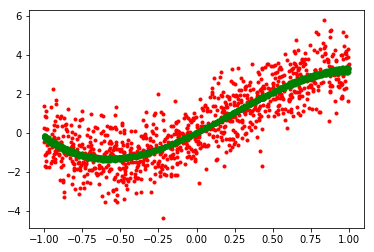

In [27]:
# Generate m data points
x = np.random.uniform(low=-1, high=1, size=(m,))
(y, t) = output(x)

# Calculate the Gram matrix
K = calculate_K(x, kernel_type='linear')
K_inv = np.linalg.inv(K + 0.001*np.eye(m))

# Calculate predictive distribution
mu = beta * np.matmul(np.linalg.inv(K_inv + beta*np.eye(m)), y.reshape((m, 1)))
sigma = np.linalg.inv(K_inv + beta*np.eye(m))

# Plot the data points
plt.plot(x, y, 'r.')

# Plot the true output
plt.plot(x, t, 'c.')

# Plot the MAP estimate
plt.plot(x, mu, 'b.')

# Plot 3 other samples
for i in range(3):
    t_samples = np.random.multivariate_normal(mu.flatten(), sigma)
    plt.plot(x, t_samples, 'g.')

# Show the plots
plt.show()

### Predictive Distribution
1. Given a new point $x$, one can find the find the distribution for corresponding $y$ as follows:
$$p(y \,\, | \,\, x, \mathcal{D}) = \int p(y, t \,\, | \,\, x, \mathcal{D})\,\, dt = \int p(y \,\, | \,\,t) p(t \,\, | \,\, x, \mathcal{D})\,\, dt$$ <br/>
2. In the integral given above the following value can be substituted:
$$p(t \,\, | \,\, x, \mathcal{D}) = \int p(t \,\, | \,\, \mathbf{t}) p(\mathbf{t} \,\, | \,\, \mathcal{D})\,\, d\mathbf{t}$$ <br/>
3. Using other results from this notebook and the usual formulas for Gaussian distribution, the following result can be obtained:
$$p(y \,\, | \,\, x, \mathcal{D}) = \mathcal{N}(y \,\, | \,\, \beta \bar{k}^\intercal K^{-1}(K^{-1} + \beta I)^{-1}y, \,\, \beta^{-1} + \bar{k}^\intercal K^{-1} \bar{k} + \bar{k}^\intercal K^{-1}(K^{-1} + \beta I)^{-1}K^{-1}\bar{k})$$ <br/>

The following code illustrates this.

[ 0.69151751  0.67779707  0.67012316  0.65172278  0.63467477  0.62298794
  0.62245206  0.61532606  0.59747346  0.59275891  0.59048054  0.58732993
  0.57752298  0.57511616  0.56365065  0.55856166  0.5545436   0.55066857
  0.54887903  0.54807141  0.54136978  0.53904684  0.53897726  0.53508604
  0.53359364  0.53241045  0.53012133  0.52980867  0.52640226  0.52374717
  0.52356283  0.52113719  0.52036997  0.51879176  0.51702563  0.51421603
  0.51341782  0.51283727  0.51281617  0.5121717   0.50995526  0.50931974
  0.50896024  0.50500191  0.50465828  0.50386872  0.50354554  0.5021658
  0.50130168  0.50118713  0.50007505  0.50035048  0.50044852  0.50054909
  0.50068648  0.50303996  0.50771133  0.50855856  0.51114042  0.51153637
  0.51163193  0.51262157  0.5127218   0.51336553  0.51398085  0.51405694
  0.51501882  0.51875651  0.5215934   0.5219399   0.52504859  0.52634086
  0.53000695  0.53015336  0.53171355  0.53532837  0.53808687  0.53978935
  0.54037362  0.54063802  0.54198355  0.54248657  0.

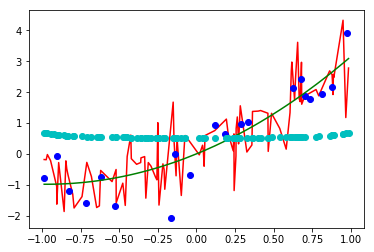

In [102]:
# Generate m data points
m = 20
sigma = 1.0
beta = 2.0
x = np.random.uniform(low=-1, high=1, size=(m,))
phi = calculate_phi(x)
(y, t) = output(x)

# Define the squared exponential kernel (RBF kernel)
def se_kernel(x, x_hat):
    #return np.exp(-np.matmul((x-x_hat).T, (x-x_hat)) / (2*sigma**2))
    return np.matmul(x.T, x_hat)
    
# Calculate the kernel matrix
K = np.zeros((m, m))
for i in range(m):
    for j in range(i+1):
        k = se_kernel(phi[i, :].reshape((n, 1)), phi[j, :].reshape((n, 1)))
        K[i, j] = k
        K[j, i] = k
K_inv = np.linalg.inv(K + 0.001*np.eye(m))

# Prepare test points
m_test = 100
x_test = np.random.uniform(low=-1, high=1, size=(m_test,))
x_test = np.sort(x_test)
phi_test = calculate_phi(x_test)

# Calculate k_bar
k_bar = np.zeros((m_test, m))
for i in range(m_test):
    for j in range(m):
        k_bar[i, j] = se_kernel(phi_test[i].reshape((n, 1)), phi[j].reshape((n, 1)))

# Calculate k
k = np.zeros((m_test,))
for i in range(m_test):
    k[i] = se_kernel(phi_test[i].reshape((n, 1)), phi_test[i].reshape((n, 1)))

# Calculate means and variances
mus = np.zeros((m_test,))
variances = np.zeros((m_test,))
for i in range(m_test):
    mus[i] = beta * np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), \
                              np.matmul(np.linalg.inv(K_inv + beta*np.eye(m)), y.reshape((m, 1))))
    variances[i] = (1/beta) + k[i] -\
                    np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), k_bar[i, :].reshape((m, 1))) + \
                    np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), \
                    np.matmul(np.linalg.inv(K_inv + beta*np.eye(m)), np.matmul(K_inv, k_bar[i, :].reshape((m, 1)))))

# Plot some functions from posterior
for i in range(1):
    t_hat = np.zeros((m_test,))
    for j in range(m_test):
        t_hat[j] = np.random.normal(loc = mus[j], scale = np.sqrt(np.abs(variances[j])))
    plt.plot(x_test, t_hat, 'r-')

plt.plot(x, y, 'bo')
plt.plot(x_test, mus, 'g-')
plt.plot(x_test, variances, 'co')
print (variances)
plt.show()

# Gaussian Process Regression without Noise
1. Given the dataset $\mathcal{D} = \{(x^{(i)}, t^{(i)}\}_{i=1}^m$, where this time we get to observe the true value of the function without any noise, we want to calculate $t = f(x)$ for a new point $x$. <br/><br/>

2. In the absence of noise one can directly find:
$$p(t \,\, | \,\, \mathbf{t}) = \mathcal{N}(\bar{k}^\intercal K^{-1} \mathbf{t}, k - \bar{k}^\intercal K^{-1} \bar{k})$$
Where, $\bar{k}$ is a vector containing the values $k(t, t^{(i)})$ for $i = 1 \rightarrow m$. <br/><br/>

3. This result has been arrived at by using the standard formulas on the joint distribution $p(t, \mathbf{t})$ which is Gaussian with mean $0$ and a known covariance matrix by the Gaussian process prior assumption. <br/><br/>

4. Since there is no noise all the distributions sampled from the posterior will pass exactly through the training dataset.<br/><br/>

5. The following code uses the squared exponential (SE) kernel.

In [ ]:
# Some useful variables
m = 5 # Number of training examples
n = 3 # Number of features to use
sigma = 0.25

# Define the squared exponential kernel (RBF kernel)
def se_kernel(x, x_hat):
    return np.exp(-np.matmul((x-x_hat).T, (x-x_hat)) / (2*sigma**2))

# Get the training data
x = np.random.uniform(low=-1, high=1, size=(m,))
phi = calculate_phi(x)
(_, t) = output(x)

# Calculate the kernel matrix
K = np.zeros((m, m))
for i in range(m):
    for j in range(i+1):
        k = se_kernel(phi[i, :].reshape((n, 1)), phi[j, :].reshape((n, 1)))
        K[i, j] = k
        K[j, i] = k
K_inv = np.linalg.inv(K + 0.001*np.eye(m))

# Prepare test points
phi_hat = calculate_phi(np.arange(-1, 1, 0.05))
m_hat = phi_hat.shape[0]

# Calculate k_bar
k_bar = np.zeros((m_hat, m))
for i in range(m_hat):
    for j in range(m):
        k_bar[i, j] = se_kernel(phi_hat[i].reshape((n, 1)), phi[j].reshape((n, 1)))

# Calculate k
k = np.zeros((m_hat,))
for i in range(m_hat):
    k[i] = se_kernel(phi_hat[i].reshape((n, 1)), phi_hat[i].reshape((n, 1)))

# Calculate means and variances
mus = np.zeros((m_hat,))
variances = np.zeros((m_hat,))
for i in range(m_hat):
    mus[i] = np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), t.reshape((m, 1)))
    variances[i] = k[i] - np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), k_bar[i, :].reshape((m, 1)))

# Plot some functions from posterior
for i in range(3):
    t_hat = np.zeros((m_hat,))
    for j in range(m_hat):
        t_hat[j] = np.random.normal(loc = mus[j], scale = np.sqrt(np.abs(variances[j])))
    plt.plot(np.arange(-1, 1, 0.05), t_hat, 'r-')

plt.plot(x, t, 'bo')
plt.show()

# Bayesian Logistic Regression
1. **Dataset: **Consider the setting for a binary classification problem where we have $\mathcal{D} = \{(x^{(i)}, y^{(i)})\}_{i=1}^m$, where as before $x \in \mathbb{R}^d$. Unlike linear regression, where $y \in \mathbb{R}$ is a continuous valued variable, in this case $y \in \{-1, 1\}$. <br/><br/>
2. **Goal: **We want to come up with a probabilistic model for $p(y|x)$. Note that we are considering a **discriminative approach** here. For the purpose of this section we will focus on a parameteric model given by:
$$p(y \,\, | \,\,x, w) = \sigma(w^\intercal \phi(x))$$
where $\sigma(.)$ is the logistic sigmoid function and $w$ is a parameter vector. The function $\phi(.)$ has same meaning as before. <br/><br/>
3. For a full Bayesian treatment, as before, we need to impose a prior on our parameter vector $w$. We use a Gaussian prior.
$$p(w) = \mathcal{N}(w \,\, | \,\, \mu_w, \Sigma_w)$$ <br/>
4.  The parameter distribution can now be inferred from data using Bayes' theorem:
$$p(w \,\, | \,\, \mathcal{D}) = \frac{p(\mathcal{D} \,\, | \,\, w) p(w)}{\int p(\mathcal{D} \,\, | \,\, w) p(w) \,\,dw}$$ <br/>
5. The probability of data for a given value of parameter vector $w$ is given by:
$$p(\mathcal{D} \,\, | w) = \prod_{i=1}^m p(y^{(i)} \,\, | \,\, x^{(i)}, w) = \prod_{i=1}^m \sigma(y^{(i)}w^\intercal \phi(x^{(i)}))$$
In case of more than two classes this step changes. <br/><br/>
6. Thus we get the following result:
$$\log p(w \,\, | \,\, \mathcal{D}) \propto \sum_{i=1}^m \log \sigma(y^{(i)}w^\intercal \phi(x^{(i)})) - \frac{1}{2} (w - \mu_w)^\intercal \Sigma_w^{-1} (w - \mu_w)$$ <br/>
7. **Laplace Approximation: **We have the $\log$ of the un-normalized probability measure. One can approximate this $\log$ using a degree two Taylor expansion around the maximum value and then exponentiate back to get an approximating normal distribution. This is called Laplace approximation. We can approximate $p(w \,\, | \,\, \mathcal{D})$ as: 
$$p(w \,\, | \,\, \mathcal{D}) \approx \mathcal{N}(w \,\, | \,\, w_{max}, [-\nabla_w^2 g(w)]_{w_{max}}^{-1})$$
Where $w_{max}$ is the value of $w$ that maximizes un-normalized log probability distribution and $g(w)$ is the un-normalized log probability distribution approximated by second order Taylor approximation around $w_{max}$.
$$\nabla_w^2 g(w) = -\sum_{i=1}^m \sigma(-y^{(i)}w^\intercal \phi(x^{(i)})) \sigma(y^{(i)}w^\intercal \phi(x^{(i)})) \phi(x^{(i)}) {\phi(x^{(i)})}^\intercal - \Sigma_w^{-1}$$ <br/>
8. The value of $w_{max}$ can be found using any existing numerical optimization technique. <br/><br/>

The following code implements this:

### Dataset Generation

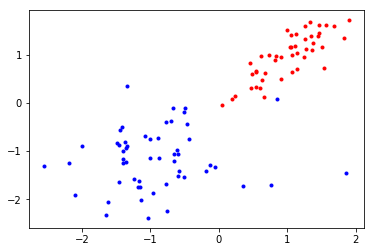

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 100 # Number of data points

# Intialize class means and variance
class_mus = np.asarray([[-1.0, -1.0], [1.0, 1.0]])
class_var = np.asarray([[[0.5, 0.0], [0.0, 0.5]], \
                        [[0.2, 0.2], [0.2, 0.3]]])
class_dist = np.asarray([0.5, 0.5])

# Some useful variables
C = class_mus.shape[0] # Number of classes
d = class_mus.shape[1] # Number of input dimensions
n = 3 # Number pf features

# Define feature functions
def calculate_phi(x):
    m = x.shape[0]
    return np.concatenate([x, x[:, 0].reshape((m, 1)) * \
                        x[:, 1].reshape((m, 1))], axis=1)

# Generate the data
x = np.zeros((m, d))
y = np.zeros((m,))
for i in range(m):
    class_idx = np.random.choice(np.arange(d), p=class_dist)
    x[i, :] = np.random.multivariate_normal(\
            class_mus[class_idx], class_var[class_idx])
    y[i] = class_idx

# Change class labels to +1 and -1
y = 2*y - 1

# Show the dataset
for i in range(m):
    if y[i] == 1:
        plt.plot(x[i, 0], x[i, 1], 'r.')
    else:
        plt.plot(x[i, 0], x[i, 1], 'b.')
plt.show()

### Define Prior

In [2]:
# Define the parameters for prior
mu_w = np.zeros((n,))
sigma_w = 1.0 * np.eye(n)

### Define the function g(.)

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def g(x, y, w):
    y_hat_p = sigmoid(y.reshape((m, 1)) * np.matmul(x, w))
    y_hat_n = sigmoid(-y.reshape((m, 1)) * np.matmul(x, w))
    val = np.sum(np.log(y_hat_p)) - \
            0.5 * np.matmul((w - mu_w.reshape((n, 1))).T, \
            np.matmul(np.linalg.inv(sigma_w), \
            (w - mu_w.reshape((n, 1)))))
    
    grad = np.matmul(x.T, y_hat_n *  y.reshape((m, 1))) - \
                    np.matmul(np.linalg.inv(sigma_w), \
                    w - mu_w.reshape((n, 1)))
    
    hess = -np.matmul((y_hat_p * y_hat_n * x).T, x) - \
            np.linalg.inv(sigma_w)
    
    return (val, grad, hess)

### Define optimization routine

In [4]:
alpha = 0.3
phi = calculate_phi(x)
w = np.random.uniform(size=(n, 1))
val, grad, _ = g(phi, y, w)
while np.linalg.norm(grad) >= 1e-3:
    w = w + alpha * grad
    val, grad, _ = g(phi, y, w)
w_max = w

### Calculate the parameter distribution

[ 0.95213407  1.12849425 -0.17452411]
[ 1.14352171  3.19918243 -0.52370207]
[ 1.64098022  2.59330892  0.24363418]


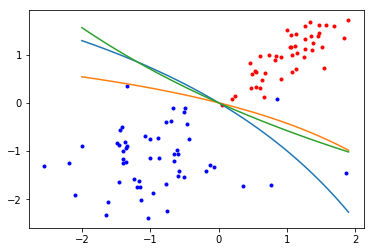

In [6]:
mu = w_max.flatten()
_, _, hess = g(phi, y, w_max)
sigma = np.linalg.inv(-hess)

# Show the parameter distribution
for i in range(m):
    if y[i] == 1:
        plt.plot(x[i, 0], x[i, 1], 'r.')
    else:
        plt.plot(x[i, 0], x[i, 1], 'b.')

for i in range(3):
    x_boundary = np.arange(-2, 2, 0.1)
    w_sample = np.random.multivariate_normal(mu, sigma)
    print (w_sample)
    #w_ratio = -w_sample[1] / w_sample[0]
    #y_boundary = w_ratio * x_boundary
    y_boundary = w_sample[0] * x_boundary / -(w_sample[1] + w_sample[2]*x_boundary)
    plt.plot(x_boundary, y_boundary)
plt.show()

# Gaussian Process Classification
1. By its very nature, the Gaussian process prior can be imposed only on variables which are continuous and span the whole real line. In the case of classification, one is interested in $p(y = +1 \,\, | \,\, x)$ which is continuous, but does not span the whole real line. Hence one can not directly define a gaussian process prior over $\pi(x) \triangleq p(y = +1 \,\, | \,\, x)$. <br/><br/>
2. **Basic Idea: **We define a **nuisance function** $f(x)$ whose range is the whole real line and then set $\pi(x) = \sigma(f(x))$. We can now define a Gaussian process prior over $f(x)$ which in turn induces a prior over $\pi(x)$ (although the induced prior is not a Gaussian process prior). <br/><br/>
3. We are interested in calculating the following distribution for a new incoming example $x$:
$$p(y = +1 \,\, | \,\, x, \mathcal{D})$$ <br/>
4. This distribution can be calculated as:
$$p(y = +1 \,\, | \,\, x, \mathcal{D}) = \int p(y = +1 \,\, | \,\, t) p(t \,\, | \,\, x, \mathcal{D}) \,\, dt$$
Where $t = f(x)$ and:
$$p(y = +1 \,\, | \,\, t) = \pi(t)$$ <br/>
5. We now need to compute $p(t \,\, | \,\, x, \mathcal{D})$. We can follow the same procedure that was used in Gaussian process regression. If we let $\mathbf{t} = [f(x^{(1)}), ..., f(x^{(m)})]^\intercal$ then the following equation holds:
$$p(t \,\, | \,\, x, \mathcal{D}) = \int p(t \,\, | \,\, \mathbf{t}) p(\mathbf{t} \,\, | \,\, \mathcal{D}) \,\, d\mathbf{t}$$ <br/>
6. Using results from Gaussian process regression we get:
$$p(t \,\, | \,\, \mathbf{t}) = \mathcal{N}(t \,\, | \,\, \bar{k}^\intercal K^{-1} \mathbf{t}, \,\, k - \bar{k}^\intercal K^{-1} \bar{k})$$ <br/>
7. We can compute $p(\mathbf{t} \,\, | \,\, \mathcal{D}) = p(\mathbf{t} \,\, | \,\, \mathbf{y})$ using the Bayes theorem to obtain the following result:
$$p(\mathbf{t} \,\, | \,\, \mathbf{y}) \propto p(\mathbf{y} \,\, | \,\, \mathbf{t}) p(\mathbf{t})$$
$$p(\mathbf{t} \,\, | \,\, \mathbf{y}) \propto \prod_{i=1}^m \sigma(y^{(i)}t^{(i)}) \mathcal{N}(\mathbf{t} \,\, | \,\, 0, K)$$ <br/>
8. One can use Laplace approximation as was used in the section on Bayesian logistic regression to arrive at the following result:
$$p(\mathbf{t} \,\, | \,\, \mathbf{y}) \approx \mathcal{N}(\mathbf{t} \,\, | \,\, \mu_\mathbf{t}, \,\, \Sigma_\mathbf{t})$$
$$\mu_\mathbf{t} = \mathbf{t}_{max}$$
$$\Sigma_\mathbf{t} = [-\nabla^2_\mathbf{t} g(t)]_{\mathbf{t}_{max}}^{-1}$$
Where, $g(t) = \sum_{i=1}^m \log \sigma(y^{(i)}t^{(i)}) - \frac{1}{2}\mathbf{t}^\intercal K^{-1} \mathbf{t}$ and $\mathbf{t}_{max}$ is the value that maximizes $g(t)$. <br/><br/>
9. Using $6$ and $8$, one can approximate $p(t \,\, | \,\, x, \mathcal{D})$ as:
$$p(t \,\, | \,\, x, \mathcal{D}) \approx \mathcal{N} (t \,\, | \,\, \mu, \Sigma)$$
$$\mu = \bar{k}^\intercal K^{-1} \mu_{\mathbf{t}}$$
$$\Sigma = k - \bar{k}^\intercal K^{-1} \bar{k} + \bar{k}^\intercal K^{-1} \Sigma_\mathbf{t} K^{-1} \bar{k}$$ <br/>
10. Once we have $p(t \,\, | \,\, x, \mathcal{D})$ we can use this to compute $p(y = +1 \,\, | \,\, x, \mathcal{D})$ using Monte-Carlo approximation (**Why not use Laplace approximation?**):
$$p(y = +1 \,\, | \,\, x, \mathcal{D}) = \mathbb{E}_{t \sim p(t \,\, | \,\, x, \mathcal{D})} [\sigma(t)]$$ <br/>

The following code implements this:

### Problem Setup

In [37]:
# Define the kernel function
def se_kernel(x, x_hat):
    sigma = 1.0
    return np.exp(-np.matmul((x-x_hat).T, x-x_hat) / (2*sigma**2))

# Calculate the kernel matrix (using the data generated earlier)
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i, j] = se_kernel(phi[i, :].reshape((n, 1)), phi[j, :].reshape((n, 1)))
K_inv = np.linalg.inv(K + 0.001*np.eye(m))

### Optimization Routine

In [54]:
# Define the function g(t)
def g(t):
    l = y.reshape((m, 1))
    val = np.sum(np.log(sigmoid(l*t))) - 0.5 * np.matmul(t.T, np.matmul(K_inv, t))
    grad = l*sigmoid(-l*t) - np.matmul(K_inv, t)
    hess = -np.diag(sigmoid(-l*t) * sigmoid(l*t)) - K_inv
    return (val, grad, hess)

# Find t_max
alpha = 0.0015
t = np.zeros((m, 1))
val, grad, _ = g(t)
while np.linalg.norm(grad) >= 1e-2:
    t = t + alpha * grad
    val, grad, _ = g(t)
t_max = t

Done


### Finding $\mu_\mathbf{t}$ and $\Sigma_\mathbf{t}$

In [55]:
# Find mu_t and sigma_t
mu_t = t_max
_, _, sigma_t = g(t_max)
sigma_t = np.linalg.inv(-sigma_t)

### Show predictive distribution

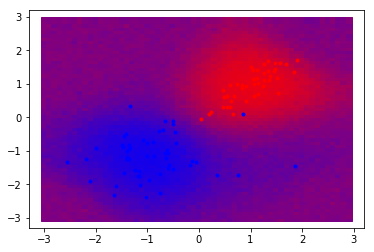

In [67]:
num_samples = 100 # Number of samples to approximate the final probability
x0 = np.arange(-3, 3, 0.1)
x1 = np.arange(-3, 3, 0.1)
num_examples = x0.shape[0]
m_test = num_examples * num_examples

# Prepare test dataset
x_test = np.zeros((m_test, 2))
for i in range(num_examples):
    for j in range(num_examples):
        x_test[num_examples*i + j, :] = np.asarray([x0[i], x1[j]]).reshape((1, 2))

# Compute test phi
phi_test = calculate_phi(x_test)

# Calculate k_bar
k_bar = np.zeros((m_test, m))
for i in range(m_test):
    for j in range(m):
        k_bar[i, j] = se_kernel(phi_test[i].reshape((n, 1)), phi[j].reshape((n, 1)))

# Calculate k
k = np.zeros((m_test,))
for i in range(m_test):
    k[i] = se_kernel(phi_test[i].reshape((n, 1)), phi_test[i].reshape((n, 1)))

# Calculate means and variances
mus = np.zeros((m_test,))
variances = np.zeros((m_test,))
for i in range(m_test):
    mus[i] = np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), mu_t)
    variances[i] = k[i] - np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), k_bar[i, :].reshape((m, 1))) + \
                    np.matmul(np.matmul(k_bar[i, :].reshape((1, m)), K_inv), \
                    np.matmul(sigma_t, np.matmul(K_inv, k_bar[i, :].reshape((m, 1)))))

# Compute samples
y_test = np.zeros((m_test, 1))
for i in range(num_samples):
    sample = np.zeros((m_test, 1))
    for j in range(m_test):
        sample[j, 0] = np.random.normal(mus[j], np.sqrt(variances[j]))
    y_test += sigmoid(sample)
y_test = y_test / num_samples

# Plot the data
for i in range(m_test):
    plt.plot(x_test[i, 0], x_test[i, 1], marker='s', color=(y_test[i, 0], 0, 1-y_test[i, 0]))

# Show the original dataset
for i in range(m):
    if y[i] == 1:
        plt.plot(x[i, 0], x[i, 1], 'r.')
    else:
        plt.plot(x[i, 0], x[i, 1], 'b.')
        
plt.show()

___
___
___
___

Consider Bayesian linear regression. The model looks like this:

$$p(y|x, w) = \mathcal{N}(y \, | \, w^\intercal \phi(x),\, \beta^{-1})$$
$$p(w) = \mathcal{N}(w \, | \, 0, \, \alpha^{-1}I)$$

Here $\phi: \mathbb{R}^d \rightarrow \mathbb{R}^n$, where $d$ is the dimensionality of input data and $n$ is the number of features. By exploiting conjugacy one can arrive at the following result for the predictive distribution.

$$p(y \, | \, x, \, \mathcal{D}) = \int p(y \, | \, x, \, w) p(w \, | \, \mathcal{D}) \, dw$$
$$p(y \, | \, x, \, \mathcal{D}) = \mathcal{N}(y \, | \, \mu, \, \sigma^2)$$

$$\mu = \phi(x)^\intercal(\Phi^\intercal\Phi + \frac{\alpha}{\beta}I)^{-1}\Phi^\intercal \mathbf{y}$$
$$\sigma^2 = \frac{1}{\beta} + \phi(x)^\intercal (\Phi^\intercal\Phi + \frac{\alpha}{\beta}I)^{-1} \phi(x)$$


# Solution - Exercise 3 - Wiener Process

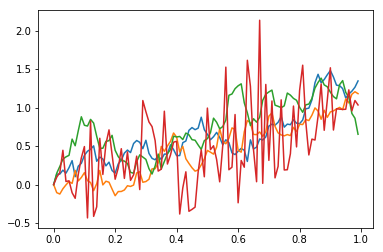

In [10]:
def min_kernel(x, y):
    return min(x, y)

x = np.arange(0, 1, 0.01)
num_examples = x.shape[0]
K = np.zeros((num_examples, num_examples))
for i in range(num_examples):
    for j in range(num_examples):
        K[i, j] = min_kernel(x[i], x[j])

# Plot 3 samples
for i in range(3):
    y_samples = np.random.multivariate_normal(np.zeros((num_examples,)), K)
    plt.plot(x, y_samples)

y_samples = np.zeros((num_examples,))
for i in range(num_examples):
    mu = min(x[i], 1)
    sigma = x[i] - mu**2
    y_samples[i] = np.random.normal(mu, np.sqrt(sigma))

plt.plot(x, y_samples)    

plt.show()